In [124]:
import pandas as pd
import numpy as np
import re 
import sys
path="../dataset/2020-2021茂名（含自媒体）.xlsx"

In [125]:
#游记
df_youji= pd.read_excel(path,sheet_name=2)
newdf_youji=pd.read_excel(path,sheet_name=2)
newdf_youji.drop({"城市","发布时间","出行天数","人物","人均费用"},axis=1,inplace=True)

In [126]:
youji_len=[]
for row in range(len(newdf_youji)):
    youji_len.append(len(newdf_youji.iloc[row,3]))

In [127]:
newdf_youji['youji_len']=youji_len

In [128]:
newdf_youji.describe()

,游记ID,youji_len
count,148.000000,148.000000
mean,1220.500000,1376.831081
std,42.868014,1448.008402
min,1147.000000,159.000000
25%,1183.750000,512.500000
50%,1220.500000,957.500000
75%,1257.250000,1571.000000
max,1294.000000,10336.000000


In [129]:
dropped_youji=newdf_youji[newdf_youji['youji_len']>4000]

In [85]:
dropped_youji.drop('youji_len',axis=1,inplace=True)

C:\Users\k\anaconda3\envs\pyto\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
dropped_youji

,游记ID,游记标题,出发时间,正文,youji_len
12,1159,宝藏小城茂名的正确打开方法,2020-04-20,突如其来的新冠肺炎疫情让早已计划好的国外度假计划泡了汤。\n\n在家宅了几个月，疫情现在也基...,7244
35,1182,茂名沿海之行2020-06,2020-06-25,序\n大概两三年没出去长途骑行了（其实去年有计划一次，出门丢行李在家躺三天），端午三天小长假...,5525
43,1190,2019年7月，鱼胶学习之旅：深圳-台山-阳江-茂名-湛江-北海-广州,2019-07-18,喜欢现在的状态：总是能很单纯的去做自事情。\n\n既然跟鱼胶有关的游记，就先端上来几张鱼㬵图...,7201
50,1197,在盛夏的蔚蓝里，且听风吟——记一场与浪漫有关的亲子旅行,2020-07-26,大手牵小手，盛夏再出发\nTA不怕黑，是因为你曾在漆黑的夜里带TA看过最亮的星。\n\nTA...,10336
70,1217,穿行水东湾海洋公园，看到的不只是红树林,2020-11-28,水东湾海洋公园位于 广东 省 茂名 市 电白 区水东湾南岸， 南海 半岛北侧。是 南海 旅游...,4083
145,1292,高州行一D1佛山至高州：潘洲公园、观山、高州博物馆、宝光塔 、缅茄树、鉴江、瀛洲公园、高凉鼓韵。,2021-11-25,2021年11月25日起了一个大早，6:30就在家门口等候网约顺风车。\n晨曦初露，云彩丰富...,5340
146,1293,我们去茂名走马观花（广东⑮）,2021-04-12,走马：路上\n爷爷是一个很重男轻女的传统 广东 人，但在看到自己曾孙还没有的情况下，就开始叨...,4516


In [141]:
long_df=pd.DataFrame(data=None,columns=dropped_youji.columns)

In [142]:
long_df

,游记ID,游记标题,出发时间,正文,youji_len


In [143]:
for com_id in dropped_youji['游记ID']:
        youji_len=len((dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,3])
        print(youji_len)
        first_half=((dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,3])[:int(youji_len/2)]
        second_half=((dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,3])[int(youji_len/2):]
        long_df=long_df.append({'游记ID':com_id,'游记标题':(dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,1],
                                    '出发时间':(dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,2],'正文':first_half},ignore_index=True)
        long_df=long_df.append({'游记ID':com_id,'游记标题':(dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,1],
                                    '出发时间':(dropped_youji[dropped_youji['游记ID']==com_id]).iloc[0,2],'正文':second_half},ignore_index=True)

7244
5525
7201
10336
4083
5340
4516


In [144]:
long_df

,游记ID,游记标题,出发时间,正文,youji_len
0,1159,宝藏小城茂名的正确打开方法,2020-04-20,突如其来的新冠肺炎疫情让早已计划好的国外度假计划泡了汤。\n\n在家宅了几个月，疫情现在也基...,NaN
1,1159,宝藏小城茂名的正确打开方法,2020-04-20,座城市\n浪漫海岸所在的 茂名 电白 区是个以海产丰富而闻名的地方，都说如果不吃海鲜，就等于...,NaN
2,1182,茂名沿海之行2020-06,2020-06-25,序\n大概两三年没出去长途骑行了（其实去年有计划一次，出门丢行李在家躺三天），端午三天小长假...,NaN
3,1182,茂名沿海之行2020-06,2020-06-25,桥\n\n博贺湾大桥是 茂名 市的第二座跨海大桥（第一座是水东湾跨海大桥，在建 ），博贺湾大...,NaN
4,1190,2019年7月，鱼胶学习之旅：深圳-台山-阳江-茂名-湛江-北海-广州,2019-07-18,喜欢现在的状态：总是能很单纯的去做自事情。\n\n既然跟鱼胶有关的游记，就先端上来几张鱼㬵图...,NaN
5,1190,2019年7月，鱼胶学习之旅：深圳-台山-阳江-茂名-湛江-北海-广州,2019-07-18,，沉香虽好，非我所欲，故告辞而去，临走前买了些熏香，随手而为，没想到在 巴马 的酒店里却派上...,NaN
6,1197,在盛夏的蔚蓝里，且听风吟——记一场与浪漫有关的亲子旅行,2020-07-26,大手牵小手，盛夏再出发\nTA不怕黑，是因为你曾在漆黑的夜里带TA看过最亮的星。\n\nTA...,NaN
7,1197,在盛夏的蔚蓝里，且听风吟——记一场与浪漫有关的亲子旅行,2020-07-26,片，你会发现，如果在海边的温德姆没有这方超大无边泳池，也会黯然失色。造型别致的无边泳池，可谓...,NaN
8,1217,穿行水东湾海洋公园，看到的不只是红树林,2020-11-28,水东湾海洋公园位于 广东 省 茂名 市 电白 区水东湾南岸， 南海 半岛北侧。是 南海 旅游...,NaN
9,1217,穿行水东湾海洋公园，看到的不只是红树林,2020-11-28,他们很高兴，向我回了个手势，其中有个女的还说“这位大叔不简单，一个人就敢步行！”如果她知道我...,NaN


In [71]:
newdf_youji.drop((newdf_youji[newdf_youji['youji_len']>4000]).index,inplace=True)
newdf_youji.drop('youji_len',axis=1,inplace=True)

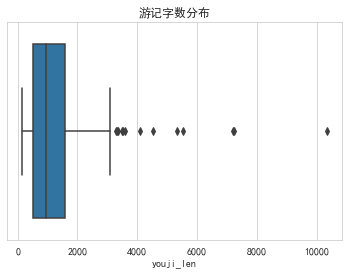

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False  
# style设置
sns.set_style('whitegrid', {'font.sans-serif': ['simhei','FangSong']})
ax = sns.boxplot(x=newdf_youji["youji_len"])
ax.set_title('游记字数分布')
box_fig=ax.get_figure()
fig_path='../fig/youjibox.png'
box_fig.savefig(fig_path, dpi = 400)

In [48]:
#对于除游记以外的名称要去除括号内的内容
def rm_kuohao(s):
    #str = u"你（你）在[在]干{干}嘛【嘛】"
    result = re.sub(u"\\（.*?）|\\{.*?}|\\[.*?]|\\【.*?】", "", s.encode('utf-8').decode())#全角括号
    result = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", result)#半角括号
    return result
#繁体转换为简体
from langconv import *
 
# 繁体转简体
def TraditionalToSimplified(content):
    line = Converter("zh-hans").convert(content)
    return line

In [49]:
#分词
import hanlp
hanlp.pretrained.mtl.ALL # MTL多任务，具体任务见模型名称，语种见名称最后一个字段或相应语料库
HanLP = hanlp.load(hanlp.pretrained.mtl.CLOSE_TOK_POS_NER_SRL_DEP_SDP_CON_ELECTRA_BASE_ZH)
ner = HanLP['ner/msra']

In [50]:
##要去除的实体类型
typelist=['LENGTH','INTEGER','MEASURE','TIME','DATE','DURATION','PERSON','ORDINAL','PERCENT']
#建立中国行政区划词典
China_region=[]
with open('province.txt',encoding='utf-8')as file_obj:
    with open('China.txt','w') as obj:
        for line in file_obj.readlines():
            line=re.sub('[a-zA-Z0-9’!"#$%&\'() （）*+,-./。，:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "", line)
            #print(line)
            obj.write(line+'\n')
            China_region.append(line)
        obj.close()
    file_obj.close()
#建立其他词典
blacklist=['中国','中华人民共和国','潮汕','广东人']

In [234]:
a='东广'
b='广东省'
b in a#判断一个字符串是否包含另一个

False

In [51]:
#对每个字符串的处理封装成函数
def regonize_entity(s):
    ans=""
    temp=HanLP(s,tasks='ner/msra')#HanLP(i)进行分词，再进行实体提取
    temp=temp['ner/msra']
    for tup in temp:#对于提取到的每一个实体
        if(tup[1] not in typelist):#若实体类型不等于要去除的实体类型
            s=tup[0]#提取实体名字
            #去除特殊符号
            fliter = re.sub('[a-zA-Z0-9’!"#$%&\'() （）*+,-./。，:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', "", s)
            if(len(fliter)>2):#若实体长度>2
                flag=False#标记词语是否为行政区划词
                if fliter in blacklist:
                    break#若在黑名单中直接break
                if fliter in China_region:
                    break

                fliter=fliter.strip('\u202c')
                if fliter not in ans:
                    ans+=(fliter+" ")#将词语加入提取的实体词典
    if ans!='':
        return ans
    else:
        return np.NaN

In [7]:
def cate_entity(tempdf,comment_type,comment_name):
    tempdf=tempdf[[comment_type,comment_name]]
    tempdf["entity"]=np.NaN
    #开始划分实体
    for row in range(len(tempdf)):
        #print("---------------"+str(row)+"--------------------")
        #tempdf.iloc[row,1]=TraditionalToSimplified(tempdf.iloc[row,1])
        tempdf.iloc[row,2]=regonize_entity(tempdf.iloc[row,1])
    tempdf=tempdf.dropna()
    return tempdf

In [145]:
#每次只需更改此处
year=2021
#newdf_hotel=newdf_hotel[(pd.to_datetime(newdf_hotel['入住日期'])).dt.year==year]
#newdf_jingqu=newdf_jingqu[(pd.to_datetime(newdf_jingqu['评论日期'])).dt.year==year]
newdf_youji=newdf_youji[(pd.to_datetime(newdf_youji['出发时间'])).dt.year==year]
#newdf_eat=newdf_eat[(pd.to_datetime(newdf_eat['评论日期'])).dt.year==year]

In [146]:
#对于long_df
year=2021
long_df=long_df[(pd.to_datetime(long_df['出发时间'])).dt.year==year]
ans_youji=cate_entity(long_df,comment_type,comment_name)

C:\Users\k\anaconda3\envs\pyto\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\k\anaconda3\envs\pyto\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [147]:
ans_youji

,游记ID,正文,entity
11,1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,革命历史博物馆 怡心亭 枫梢树 石耸台 宝光塔 宝光塔公园 宝光公园 高州市人民政府 广东省...
12,1293,走马：路上\n爷爷是一个很重男轻女的传统 广东 人，但在看到自己曾孙还没有的情况下，就开始叨...,茂名界 鹅凰嶂
13,1293,宾馆的价钱，经济酒店的配置，真的便靓正\n叫高美酒店，新开没多久，老板娘很热情，虽然地方有点...,高美酒店


In [136]:
#评论类型
comment_type="游记ID"
comment_name="正文"

#ans_youji2=cate_entity(newdf_youji.iloc[20:40,:],comment_type,comment_name)
#ans_youji3=cate_entity(newdf_youji.iloc[40:,:],comment_type,comment_name)

In [107]:
len(newdf_youji)

59

In [75]:
ans_youji=cate_entity(newdf_youji,comment_type,comment_name)

C:\Users\k\anaconda3\envs\pyto\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\k\anaconda3\envs\pyto\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [148]:
ans_df=pd.DataFrame(data=None,columns=['语料ID','语料','产品名称'])
ans_df
for com_id in ans_youji['游记ID']:
    for entity in ((ans_youji[ans_youji['游记ID']==com_id]).iloc[0,2]).split(" "):
        if entity!="":
            corpus=(ans_youji[ans_youji['游记ID']==com_id]).iloc[0,1]#语料
            ans_df=ans_df.append({'语料ID':('游记ID-'+str(com_id)),'语料':corpus,'产品名称':entity},ignore_index=True)

In [149]:
ans_df

,语料ID,语料,产品名称
0,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,革命历史博物馆
1,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,怡心亭
2,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,枫梢树
3,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,石耸台
4,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,宝光塔
5,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,宝光塔公园
6,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,宝光公园
7,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,高州市人民政府
8,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,广东省文管会
9,游记ID-1292,观山清景昼森森”的清幽、古朴的自然韵味，诱人于千里之外。四时八节，游人不绝。\n革命历史博物...,周家宅


In [150]:
ans_df.to_excel('2021longyouji.xlsx',index=False)

In [113]:
year

2020

In [43]:
with pd.ExcelWriter('2020-2021task2-1.xlsx') as writer:
    #df2018.to_excel(writer, sheet_name='2018', index=False)
    #df2019.to_excel(writer, sheet_name='2019', index=False)
    df2020.to_excel(writer, sheet_name='2020', index=False)
    #df2021.to_excel(writer, sheet_name='2021', index=False)

In [22]:
df2020=ans_df

In [41]:
df2021=ans_df

In [269]:
df2018

,语料ID,语料,产品名称
0,餐饮评论ID-1039,嫩滑不腻的奶油，香甜的芒果蛋糕，很赞！多次回购！儿子很喜欢这家奥尔良西多士，很……好吃！全五...,奥尔良西多士
1,餐饮评论ID-1063,环境很棒，东南亚风情比得上泰国游的星级酒店。套餐分量比较足，而且不粗糙，口味还算不错，若是追...,东南亚
2,餐饮评论ID-1144,味道一般，态度超差，老板和老板娘不亲善，很沟屎，不知是不是家财万贯？惨过我欠他十万九千七咁个...,十万九千七
3,餐饮评论ID-1156,第一次去 点的清江鱼 超级小的鱼 也就一斤多 再去了内脏就没什么了 我吃了三块...,清江鱼
4,餐饮评论ID-1157,味道非常好，7个人去吃烤鱼，开了三个锅，哈哈，美团美团非常实惠，服务态度也非常好，表示下次还...,美团美团
...,...,...,...
1723,景区评论ID-1525,赤坎 大通街是湛江最古老的商业街之一，它与广东省湛江最古老的街道古老渡街相接，是见证赤坎区古...,赤坎大通街
1724,景区评论ID-1525,赤坎 大通街是湛江最古老的商业街之一，它与广东省湛江最古老的街道古老渡街相接，是见证赤坎区古...,老渡街
1725,景区评论ID-1526,不错的地方，喜欢海，第一次感受大海零距离，2004虎门，那也只是珠江口与海交接的地方、200...,珠江口
1726,景区评论ID-1526,不错的地方，喜欢海，第一次感受大海零距离，2004虎门，那也只是珠江口与海交接的地方、200...,深圳湾


In [270]:
df2019

,语料ID,语料,产品名称
0,餐饮评论ID-1791,果之度的蛋糕榴莲味很浓郁，比较好吃就是个头小了点,果之度
1,餐饮评论ID-1814,老板系位，帅气男人，而且服务好，微信，给你一百个赞，榴莲睇没什么，奶油多，但食又几香榴莲味，...,果之度
2,餐饮评论ID-1862,奶油不错，就是原价买会比较贵，如果没有美团估计也不会买了 #咸奶油奥利奥可可薄脆盒子蛋糕#,奥可可
3,餐饮评论ID-1867,经常来。还对来说还是不错的。两三天来吃一次。比华莱士的好吃多了,华莱士
4,餐饮评论ID-1869,超级超级好吃。 分量足。 味道正。 环境好。卫生干净。 水东超级好的一间餐厅。...,安格斯
...,...,...,...
1388,景区评论ID-1525,赤坎 大通街是湛江最古老的商业街之一，它与广东省湛江最古老的街道古老渡街相接，是见证赤坎区古...,赤坎大通街
1389,景区评论ID-1525,赤坎 大通街是湛江最古老的商业街之一，它与广东省湛江最古老的街道古老渡街相接，是见证赤坎区古...,老渡街
1390,景区评论ID-1526,不错的地方，喜欢海，第一次感受大海零距离，2004虎门，那也只是珠江口与海交接的地方、200...,珠江口
1391,景区评论ID-1526,不错的地方，喜欢海，第一次感受大海零距离，2004虎门，那也只是珠江口与海交接的地方、200...,深圳湾


In [174]:
import hanlp
hanlp.pretrained.sts.ALL # 语种见名称最后一个字段或相应语料库

{'STS_ELECTRA_BASE_ZH': 'https://file.hankcs.com/hanlp/sts/sts_electra_base_zh_20210530_200109.zip'}

In [147]:
sts = hanlp.load(hanlp.pretrained.sts.STS_ELECTRA_BASE_ZH)

100% 362.0 MiB 397.2 KiB/s ETA:  0 s [=============================================================]
Decompressing C:\Users\k\AppData\Roaming\hanlp\sts/sts_electra_base_zh_20210530_200109.zip to C:\Users\k\AppData\Roaming\hanlp\sts
100%  41.2 KiB  41.2 KiB/s ETA:  0 s [=============================================================]
Decompressing C:\Users\k\AppData\Roaming\hanlp\transformers/electra_zh_base_20210706_125233.zip to C:\Users\k\AppData\Roaming\hanlp\transformers


In [177]:
sts([
    ('水东湾', '水中东湾'),
    ('无线路由器怎么无线上网', '无线上网卡和无线路由器怎么用'),
    ('北京到上海的动车票', '上海到北京的动车票'),
])

[0.9797298908233643, 0.0, 0.003458738327026367]